In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Invoice ID;;;;;;;;;;;;;;;;;;;  1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [41]:
df.describe()

,Invoice ID;;;;;;;;;;;;;;;;;;;
count,1000
unique,1000
top,849-09-3807;A;Yangon;Member;Female;Fashion acc...
freq,1


In [42]:
df.isnull().sum()

,0
Invoice ID;;;;;;;;;;;;;;;;;;;,0


In [69]:
X = df.drop('Total', axis=1)   # جميع الأعمدة ما عدا 'Total'
y = df['Total']                # عمود 'Total' هو المتغير الهدف

In [70]:
X = X.drop(['Invoice ID', 'gross margin percentage', 'Date', 'Time'], axis=1) # إسقاط الأعمدة غير الضرورية

In [71]:
X = pd.get_dummies(X, drop_first=True) # تحويل المتغيرات الفئوية إلى dummy variables

In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (800, 19)
X_test shape: (200, 19)
y_train shape: (800,)
y_test shape: (200,)


In [65]:
import pandas as pd
import numpy as np

file_path = "/content/drive/MyDrive/Supermarket Sales.csv"

# Define the correct column names
correct_column_names = [
    'Invoice ID', 'Branch', 'City', 'Customer type', 'Gender', 'Product line',
    'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date', 'Time', 'Payment',
    'cogs', 'gross margin percentage', 'gross income', 'Rating'
]

# Read the CSV, explicitly specifying the separator and skipping the header row.
# This avoids issues with malformed headers and directly loads data rows.
# Use 'latin1' encoding as a common fallback for CSV issues, though 'utf-8' is default.
df = pd.read_csv(file_path, sep=';', header=None, skiprows=1, encoding='latin1')

# Now assign the predefined correct_column_names
# First, ensure the number of columns in the loaded df matches the expected number.
if df.shape[1] == len(correct_column_names):
    df.columns = correct_column_names
else:
    print(f"Warning: Number of columns after loading ({df.shape[1]}) does not match expected ({len(correct_column_names)}).")
    print("Attempting to adjust columns to match predefined names.")
    if df.shape[1] > len(correct_column_names):
        df = df.iloc[:, :len(correct_column_names)] # Trim extra columns
        df.columns = correct_column_names
    else: # df.shape[1] < len(correct_column_names)
        # This is a more problematic scenario, as data for some columns might be missing.
        # For now, we'll assign what we can and warn.
        temp_cols = correct_column_names[:df.shape[1]]
        df.columns = temp_cols
        print(f"Critical Error: Fewer columns than expected. Loaded {df.shape[1]} columns, expected {len(correct_column_names)}. Data for {correct_column_names[df.shape[1]:]} will be missing.")


# Convert 'Date' and 'Time' columns to appropriate formats
# Use errors='coerce' to turn unparseable dates/times into NaT/NaN without crashing
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y', errors='coerce')
if 'Time' in df.columns:
    df['Time'] = pd.to_datetime(df['Time'], format='%H:%M', errors='coerce').dt.time

print("DataFrame after loading and initial preprocessing:")
display(df.head())
df.info()

Attempting to adjust columns to match predefined names.
DataFrame after loading and initial preprocessing:


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-05-01,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-08-03,10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,NaT,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-08-02,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     413 non-null    datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [66]:
X = df.drop('Total', axis=1)   # جميع الأعمدة ما عدا 'Total'
y = df['Total']                # عمود 'Total' هو المتغير الهدف

In [67]:
X = X.drop(['Invoice ID', 'gross margin percentage', 'Date', 'Time'], axis=1) # إسقاط الأعمدة غير الضرورية

In [68]:
X = pd.get_dummies(X, drop_first=True) # تحويل المتغيرات الفئوية إلى dummy variables

In [73]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (800, 19)
X_test shape: (200, 19)
y_train shape: (800,)
y_test shape: (200,)


In [74]:
X = pd.get_dummies(X, drop_first=True) # تحويل المتغيرات الفئوية إلى dummy variables

In [75]:
from sklearn.preprocessing import StandardScaler

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data
scaler.fit(X_train)

# Transform both training and testing data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to pandas DataFrames with original column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)
display(X_train_scaled.head())
display(X_test_scaled.head())

X_train_scaled shape: (800, 19)
X_test_scaled shape: (200, 19)


,Unit price,Quantity,Tax 5%,cogs,gross income,Rating,Branch_B,Branch_C,City_Naypyitaw,City_Yangon,Customer type_Normal,Gender_Male,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Payment_Credit card,Payment_Ewallet
29,-1.160308,1.184657,-0.345462,-0.345462,-0.345462,0.237995,-0.713746,-0.701810,-0.701810,1.416869,1.010051,1.012579,-0.460566,-0.478413,2.416114,-0.432370,-0.45257,-0.68009,-0.723747
535,-1.473301,0.507468,-0.808736,-0.808736,-0.808736,0.237995,-0.713746,1.424887,1.424887,-0.705781,1.010051,1.012579,-0.460566,-0.478413,-0.413888,2.312835,-0.45257,-0.68009,1.381699
695,1.218746,-0.169720,0.573317,0.573317,0.573317,-0.230240,-0.713746,-0.701810,-0.701810,1.416869,-0.990050,-0.987577,-0.460566,-0.478413,-0.413888,2.312835,-0.45257,-0.68009,-0.723747
557,1.643305,1.523251,2.940413,2.940413,2.940413,-1.459358,-0.713746,1.424887,1.424887,-0.705781,-0.990050,-0.987577,-0.460566,2.090246,-0.413888,-0.432370,-0.45257,-0.68009,1.381699
836,-0.640556,-0.169720,-0.480619,-0.480619,-0.480619,-0.815534,-0.713746,-0.701810,-0.701810,1.416869,-0.990050,1.012579,2.171241,-0.478413,-0.413888,-0.432370,-0.45257,-0.68009,1.381699


,Unit price,Quantity,Tax 5%,cogs,gross income,Rating,Branch_B,Branch_C,City_Naypyitaw,City_Yangon,Customer type_Normal,Gender_Male,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Payment_Credit card,Payment_Ewallet
521,1.058823,0.168874,0.841690,0.841690,0.841690,0.179466,-0.713746,1.424887,1.424887,-0.705781,-0.990050,-0.987577,-0.460566,-0.478413,-0.413888,2.312835,-0.452570,-0.68009,-0.723747
737,0.129362,1.523251,1.224069,1.224069,1.224069,1.174466,-0.713746,1.424887,1.424887,-0.705781,1.010051,1.012579,-0.460566,-0.478413,-0.413888,-0.432370,-0.452570,-0.68009,1.381699
740,0.009419,0.507468,0.367926,0.367926,0.367926,0.881819,-0.713746,1.424887,1.424887,-0.705781,1.010051,1.012579,-0.460566,-0.478413,-0.413888,2.312835,-0.452570,-0.68009,-0.723747
660,-0.471875,-0.846909,-0.755985,-0.755985,-0.755985,1.350054,1.401058,-0.701810,-0.701810,-0.705781,1.010051,-0.987577,-0.460566,-0.478413,-0.413888,-0.432370,2.209605,-0.68009,-0.723747
411,-1.275300,-1.185503,-1.123644,-1.123644,-1.123644,-0.054652,1.401058,-0.701810,-0.701810,-0.705781,1.010051,1.012579,-0.460566,-0.478413,-0.413888,-0.432370,2.209605,-0.68009,1.381699


In [76]:
from sklearn.ensemble import RandomForestRegressor

# Create a RandomForestRegressor model with a specified random state for reproducibility
rf_regressor = RandomForestRegressor(random_state=42)

# Train the model on the scaled training data
rf_regressor.fit(X_train_scaled, y_train)

print("RandomForestRegressor model trained successfully.")

RandomForestRegressor model trained successfully.


In [77]:
predictions = rf_regressor.predict(X_test_scaled)

print("Predictions generated successfully.")
print(f"First 5 predictions: {predictions[:5]}")

Predictions generated successfully.
First 5 predictions: [522.287115 621.589395 408.30762  135.88869   44.64411 ]


In [78]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Calculate R-squared
r2 = r2_score(y_test, predictions)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)

# Print the evaluation metrics
print(f"R-squared (R²): {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

R-squared (R²): 1.0000
Mean Squared Error (MSE): 1.4578
Mean Absolute Error (MAE): 0.7224


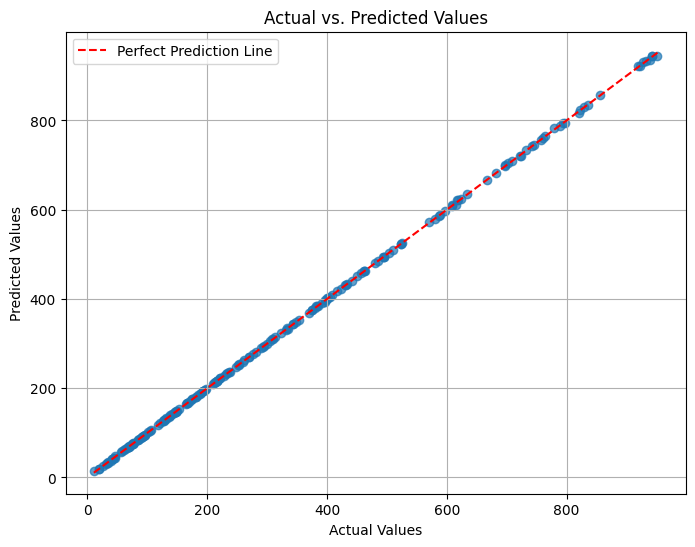

In [79]:
import matplotlib.pyplot as plt
import numpy as np

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.7)

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')

# Add a diagonal line for perfect predictions
# Determine the range for the diagonal line
min_val = min(y_test.min(), predictions.min())
max_val = max(y_test.max(), predictions.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Prediction Line')

plt.legend()
plt.grid(True)
plt.show()


In [80]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# 2. قم بتهيئة KFold مع n_splits (على سبيل المثال، 5 أو 10) و shuffle=True و random_state=42 لضمان قابلية الاستنساخ.
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 3. قم بإنشاء نموذج RandomForestRegressor جديد، بنفس المعلمات المستخدمة سابقًا (على سبيل المثال، random_state=42).
rf_model_cv = RandomForestRegressor(random_state=42)

# 4. استخدم cross_val_score لتقييم أداء النموذج على X_train_scaled و y_train باستخدام cv (كروس فاليديشن) الذي تم تهيئته في الخطوة 2.
# 5. قم بتعيين scoring='neg_mean_squared_error' للحصول على تقييم MSE.
mse_scores = cross_val_score(
    rf_model_cv,
    X_train_scaled,
    y_train,
    cv=kf,
    scoring='neg_mean_squared_error'
)

# Convert negative MSE scores to positive MSE
positive_mse_scores = -mse_scores

# 6. قم بطباعة متوسط درجات التحقق المتقاطع (MSE) والانحراف المعياري لهذه الدرجات.
print(f"Mean Cross-Validation MSE: {np.mean(positive_mse_scores):.4f}")
print(f"Standard Deviation of Cross-Validation MSE: {np.std(positive_mse_scores):.4f}")

Mean Cross-Validation MSE: 4.1671
Standard Deviation of Cross-Validation MSE: 1.8924
